In [10]:
from sklearn.decomposition import PCA
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
heart_path = Path("resources/heart.csv")
heart_no_zeros_path = Path("resources/heart_no_zeros.csv")
heart_replaced_values_path = Path("resources/heart_replaced_values.csv")
df = pd.read_csv(heart_path, delimiter=",")
df_no_zeros = pd.read_csv(heart_no_zeros_path, delimiter=",")
df_replaced_values = pd.read_csv(heart_replaced_values_path, delimiter=",")

# Preview DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
new_df = pd.get_dummies(df)
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [16]:
scaled = StandardScaler().fit_transform(new_df)
scaled[0]

array([-1.4331398 ,  0.41090889,  0.82507026, -0.55134134,  1.38292822,
       -0.83243239, -1.11311472, -0.51595242,  0.51595242, -1.08413811,
        2.07517671, -0.53283777, -0.22967867, -0.50747832,  0.81427482,
       -0.49044933,  0.8235563 , -0.8235563 , -0.27144836, -1.00218103,
        1.15067399])

In [18]:
pca = PCA()


heart_pca = pca.fit_transform(scaled)
#heart_no_zeros_pca = pca.fit_transform(df_no_zeros)
#heart_replaced_values_pca = pca.fit_transform(df_replaced_values)
pca.explained_variance_ratio_

array([2.40266491e-01, 9.69048223e-02, 8.66286881e-02, 6.87770973e-02,
       6.84662177e-02, 6.15981203e-02, 5.86632949e-02, 5.43220535e-02,
       4.86711232e-02, 4.32067373e-02, 3.95034573e-02, 3.85248316e-02,
       3.01227756e-02, 2.65093111e-02, 2.09382284e-02, 1.68967507e-02,
       4.96828305e-33, 2.70907340e-33, 1.83189131e-33, 9.48736071e-34,
       2.40075123e-35])

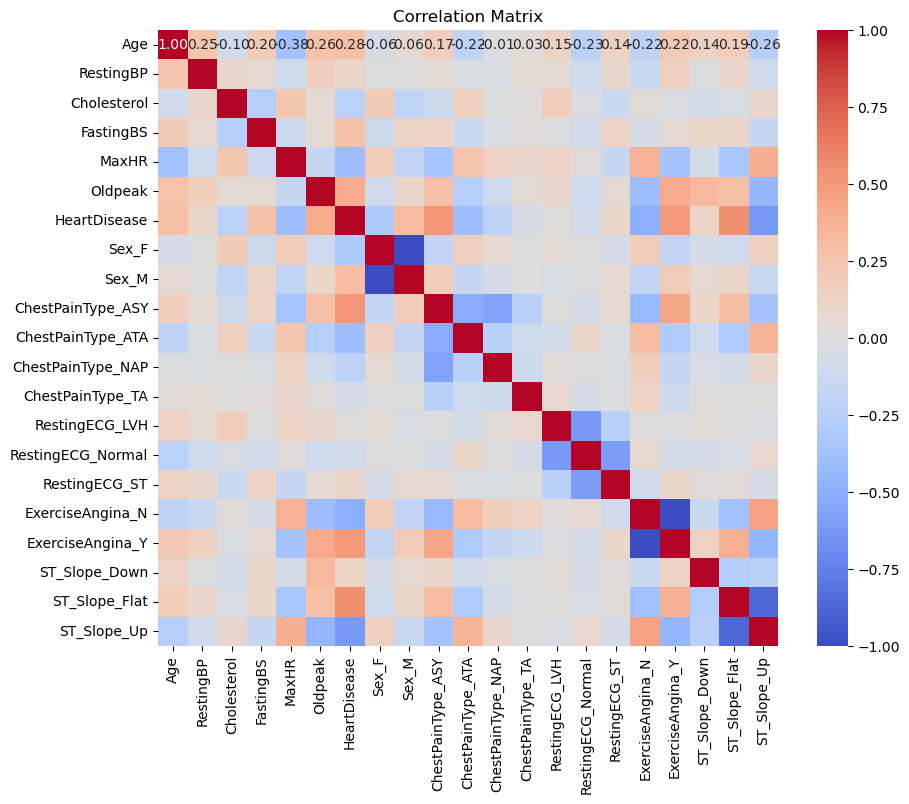

In [20]:
correlation_matrix = new_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()